In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from prettytable import PrettyTable
from sklearn import svm
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures


accuracies = {}

def perform_prediction(model, x_train, y_train, x_test, y_test, method, print_coefficients=False):
    model.fit(x_train, y_train)
    if print_coefficients:
        print("Coefficients: \n", model.coef_)
        _ = [print(k, v) for k, v in zip(x_train.columns, model.coef_)]
        print("Intercept: \n", model.intercept_)

    score = model.score(x_test, y_test)
    print(f"Score: {score}")

    y_pred = model.predict(x_test)
    plt.scatter(y_pred, y_test)
    plt.plot(y_test, y_test, c='r')
    plt.title(method)
    plt.grid()
    plt.xlabel('y (истинные)')
    plt.ylabel('y (предсказанные)')

    global accuracies
    accuracies[method] = score

In [2]:
california = fetch_california_housing()
type(california)
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [4]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [6]:
y = data['Price']
x = data.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=160) 

Coefficients: 
 [ 4.40204508e-01  9.56823673e-03 -1.14222566e-01  6.82418276e-01
 -3.32392057e-06 -3.61425838e-03 -4.20361154e-01 -4.33341342e-01]
MedInc 0.4402045079931499
HouseAge 0.009568236733306212
AveRooms -0.11422256559923966
AveBedrms 0.6824182755414601
Population -3.3239205668913335e-06
AveOccup -0.003614258376244915
Latitude -0.4203611539771952
Longitude -0.4333413418131219
Intercept: 
 -36.85790997715766
Score: 0.5958833949634965


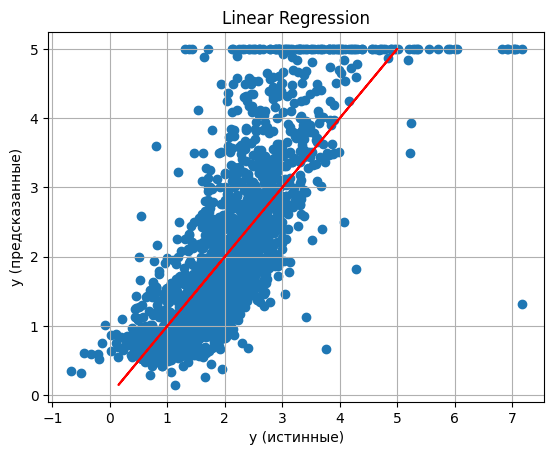

In [7]:
perform_prediction(LinearRegression(), x_train, y_train, x_test, y_test, 'Linear Regression', print_coefficients=True)

Score: 0.6698568473364895


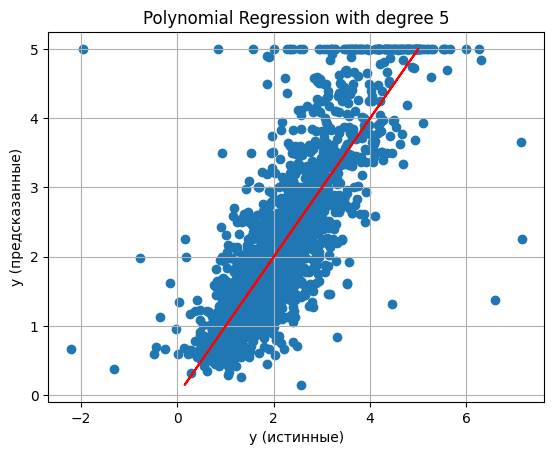

In [8]:
degree = 5
poly_x_train = PolynomialFeatures(degree).fit_transform(x_train)
poly_x_test = PolynomialFeatures(degree).fit_transform(x_test)

perform_prediction(LinearRegression(), poly_x_train, y_train, poly_x_test, y_test, f'Polynomial Regression with degree {degree}')

Score: -0.012775224916290018


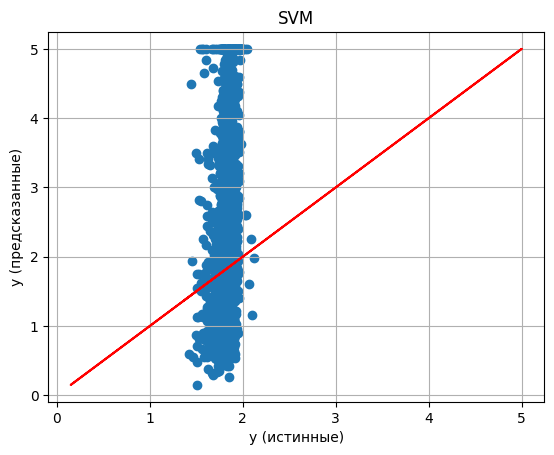

In [9]:
perform_prediction(svm.SVR(), x_train.values, y_train.values, x_test.values, y_test.values, 'SVM')

Score: 0.0060668944522620505


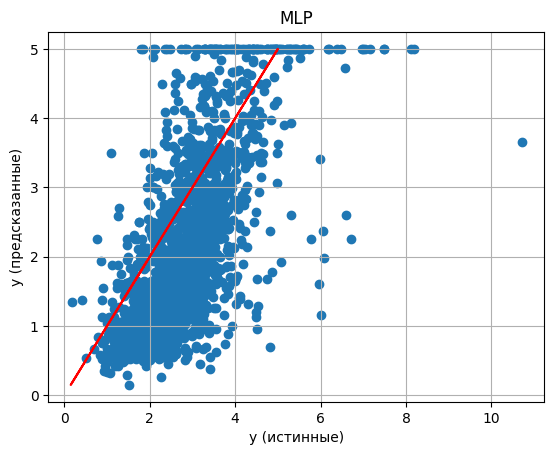

In [10]:
perform_prediction(MLPRegressor(), x_train.values, y_train.values, x_test.values, y_test.values, 'MLP')

Score: 0.8103148854573918


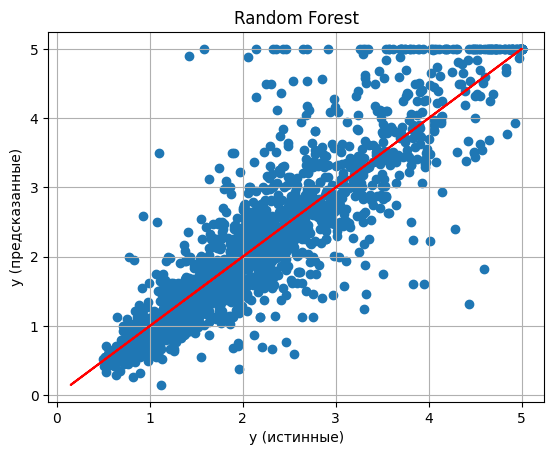

In [11]:
perform_prediction(RandomForestRegressor(), x_train.values, y_train.values, x_test.values, y_test.values, 'Random Forest')

In [12]:
table = PrettyTable()
table.field_names = ["Метод", "Оценка точности"]
for method in accuracies.keys():
    table.add_row([method, round(accuracies[method],5)])
print(table)

+-------------------------------------+-----------------+
|                Метод                | Оценка точности |
+-------------------------------------+-----------------+
|          Linear Regression          |     0.59588     |
| Polynomial Regression with degree 5 |     0.66986     |
|                 SVM                 |     -0.01278    |
|                 MLP                 |     0.00607     |
|            Random Forest            |     0.81031     |
+-------------------------------------+-----------------+
